# Determinination of the hydraulic diffusivity from a horizontal infiltration experiment

## M. Vanclooster 09 July 2018


In this notebook, we determine the hydraulic diffusivity from a horizontal infiltration experiment. We consider a soil column of 20 cm length. We have installed soil water sensors (TDR sensors) at 1 cm, 5 cm, 10 cm and 15 cm and we put the soil column horizontally in contact with a water reservoir and determine the soil water content as a function of time. We use the data of this experiment to determine the hydraulic diffusivity.

We start again with initialising the Python environment.

In [1]:
# Miscellaneous operating system interfaces
import os
# Python Numerical computating library
import numpy as np
# Python Scientifical computing library
import scipy as sc
# Python plotting library
from matplotlib import pyplot as plt
# Allowing plot inside the notebook
%matplotlib inline

We subsequently introduce our experimental data: 

In [2]:
t_obs=np.array([0.5, 1, 2, 5, 10, 20, 30, 60, 120]) # minutes
x_obs=np.array([1, 5, 10, 15])# cm 
th_obs_1=np.array([0.33, 0.32, 0.34, 0.33, 0.32,0.34, 0.33, 0.32, 0.33])
th_obs_5=np.array([0.07, 0.12, 0.25, 0.28, 0.31,0.32, 0.33, 0.33, 0.33])
th_obs_10=np.array([0.07, 0.09, 0.14, 0.18, 0.24,0.27, 0.30, 0.31, 0.33])
th_obs_15=np.array([0.07, 0.07, 0.09, 0.11, 0.18,0.22, 0.26, 0.28, 0.30])

We will first have a look to the experimental results in the time domain:

Text(0,0.5,'Soil water content')

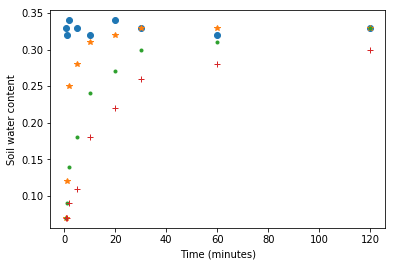

In [3]:
plt.plot(t_obs,th_obs_1, 'o',t_obs,th_obs_5,'*',t_obs,th_obs_10,'.',t_obs,th_obs_15,'+')
plt.xlabel('Time (minutes)')
plt.ylabel('Soil water content')

We can also have a look to it in the space domain

In [4]:
th_obs_t_05=[th_obs_1[0],th_obs_5[0],th_obs_10[0], th_obs_15[0]]
th_obs_t_1=[th_obs_1[1],th_obs_5[1],th_obs_10[1], th_obs_15[1]]
th_obs_t_2=[th_obs_1[2],th_obs_5[2],th_obs_10[2], th_obs_15[2]]
th_obs_t_5=[th_obs_1[3],th_obs_5[3],th_obs_10[3], th_obs_15[3]]
th_obs_t_10=[th_obs_1[4],th_obs_5[4],th_obs_10[4], th_obs_15[4]]
th_obs_t_20=[th_obs_1[5],th_obs_5[5],th_obs_10[5], th_obs_15[5]]
th_obs_t_30=[th_obs_1[6],th_obs_5[6],th_obs_10[6], th_obs_15[6]]
th_obs_t_60=[th_obs_1[7],th_obs_5[7],th_obs_10[7], th_obs_15[7]]
th_obs_t_120=[th_obs_1[8],th_obs_5[8],th_obs_10[8], th_obs_15[8]]


Text(0,0.5,'Soil water content (-)')

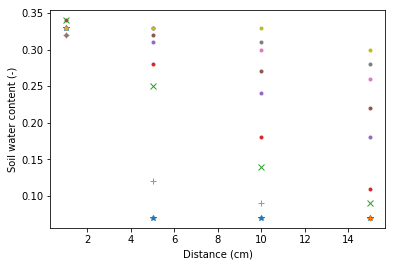

In [5]:
plt.plot(x_obs,th_obs_t_05,'*',x_obs,th_obs_t_1,'+',x_obs,th_obs_t_2,'x',x_obs,th_obs_t_5,'.',x_obs,th_obs_t_10,'.',x_obs,th_obs_t_20,'.',x_obs,th_obs_t_30,'.', x_obs,th_obs_t_60,'.',x_obs,th_obs_t_120,'.')
plt.xlabel('Distance (cm)')
plt.ylabel('Soil water content (-)')

In order to analyse the data, we introduce the Boltzman transform, $\eta=x/\sqrt(t)$

In [6]:
eta1 = x_obs/np.sqrt(0.5)
eta2 = x_obs/np.sqrt(1)
eta3 = x_obs/np.sqrt(2)
eta4 = x_obs/np.sqrt(5)
eta5 = x_obs/np.sqrt(10)
eta6 = x_obs/np.sqrt(20)
eta7 = x_obs/np.sqrt(30)
eta8 = x_obs/np.sqrt(60)
eta9 = x_obs/np.sqrt(120)

Text(0,0.5,'Soil water content (-)')

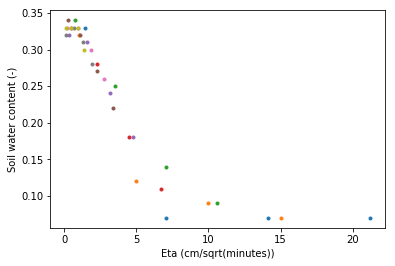

In [7]:
plt.plot(eta1,th_obs_t_05,'.',eta2,th_obs_t_1,'.',eta3,th_obs_t_2,'.',eta4,th_obs_t_5,'.',eta5,th_obs_t_10,'.',eta6,th_obs_t_20,'.',eta7,th_obs_t_30,'.', eta8,th_obs_t_60,'.',eta9,th_obs_t_120,'.')
plt.xlabel('Eta (cm/sqrt(minutes))')
plt.ylabel('Soil water content (-)')

We observe indeed that the data align together in the $\eta$ space. Hence, we regroup our data and apply the analysis in the Boltzman space

In [8]:
eta= np.hstack((eta1,eta2,eta3,eta4,eta5,eta6,eta7,eta8,eta9))
th_obs=np.hstack((th_obs_t_05,th_obs_t_1,th_obs_t_2, th_obs_t_5, th_obs_t_10, th_obs_t_20, th_obs_t_30, th_obs_t_60, th_obs_t_120))

Text(0,0.5,'Soil water content (-)')

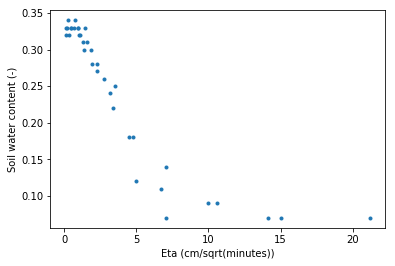

In [9]:
plt.plot(eta,th_obs,'.')
plt.xlabel('Eta (cm/sqrt(minutes))')
plt.ylabel('Soil water content (-)')

We consider in this case that the initial water content and saturated water content is known: $\theta_i=0.07$ and $\theta_s=0.34$. We first fit a continuous curve through the data. Since the shape of the cruve is similar to what we use for fitting the retention model, we fit the van Genuchten parametric model through the diffusion data. 

Text(0,0.5,'Soil water content (-)')

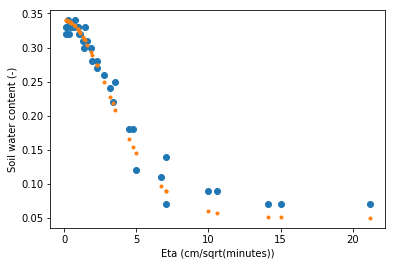

In [10]:
def boltzman_model(eta,alfa,n,m):
    return 0.07+(0.34-0.07)/(1+(alfa*eta)**n)**m

from scipy.optimize import curve_fit

popt, pcov = curve_fit(boltzman_model, eta, th_obs,  bounds=([0,1,0], [2., 5.,5.]))

thr = 0.05
ths = 0.34
alfa_opt = popt[0]
n_opt = popt[1]
m_opt = popt[2] 

th_sim = thr+(ths-thr)/(1+(alfa_opt*eta)**n_opt)**m_opt

plt.plot(eta,th_obs,'o',eta,th_sim,'.');
plt.xlabel('Eta (cm/sqrt(minutes))')
plt.ylabel('Soil water content (-)')

Since the considered Boltzman model is parametric, we can calculate the derivative as a close form expression, as done when calculating the differential water capacity

In [11]:
slope= -m_opt*n_opt*(alfa_opt*eta)**n_opt*(-thr + ths)*((alfa_opt*eta)**n_opt + 1)**(-m_opt)/(eta*((alfa_opt*eta)**n_opt + 1))

Text(0,0.5,'d theta / d eta  (-)')

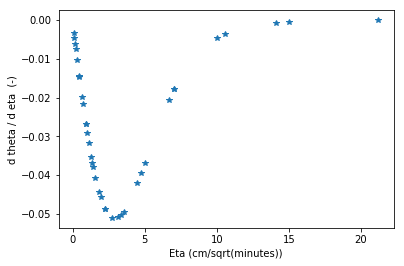

In [16]:
plt.plot(eta,slope,'*')
plt.xlabel('Eta (cm/sqrt(minutes))')
plt.ylabel('d theta / d eta  (-)')

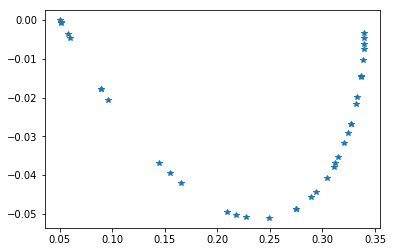

In [95]:
plt.plot(th_sim,slope,'*')

Finally we need to integrate the curve for different $\theta$ values. We calculate first the inverse function. 


In [96]:
eta_calc=(((-thr + ths)/(th_sim - thr))**(1/m_opt) - 1)**(1/n_opt)/alfa_opt

Text(0,0.5,'eta_calc  (-)')

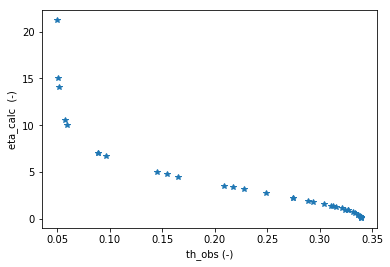

In [97]:
plt.plot(th_sim,eta_calc,'*')
plt.xlabel('th_obs (-)')
plt.ylabel('eta_calc  (-)')

Subsequently, we integrate this function using Gaussian quadrature. We also interpolate the integral function for each observation point of $\theta$.

In [103]:
th=np.arange(thr,ths,0.01)

from scipy.integrate import quad

def integrand (th,ths,thr,alfa_opt,n_opt,m_opt):
    return (((-thr + ths)/(th - thr))**(1/m_opt) - 1)**(1/n_opt)/alfa_opt

th_int=np.arange(thr+0.01,ths,0.01)
inte=29*[0]
inte2=29*[0]

for i in range(0,29):
    inte[i]=quad(integrand,thr,th_int[i], args=(ths,thr,alfa_opt,n_opt,m_opt))
    inte2[i]=inte[i][0]
    
inte3=np.interp(th_sim,th_int,inte2)

The diffusivity can be obtained for each observed $\theta$, using the following formula: 

\begin{equation}
D(\theta)=-0.5 \frac{1}{\frac{\partial \theta}{\partial \eta}}\int_{\theta_i}^{\theta} \eta d \theta 
\end{equation}



In [104]:
diffus=-1/2*(1/slope)*inte3

Text(0,0.5,'Diffusivity (cm^^2 / min)')

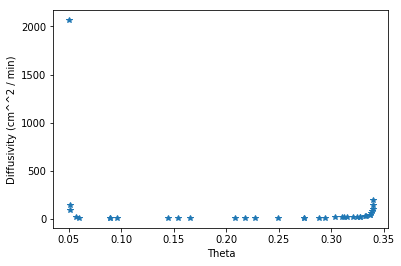

In [108]:
plt.plot(th_sim,diffus,'*')
plt.xlabel('Theta')
plt.ylabel('Diffusivity (cm^^2 / min)')